In [239]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
import numpy as np
from scipy.stats import linregress

In [240]:
labor_all_csv = 'David_Labor/lab_ratio.csv'
labor_all = pd.read_csv(literacy_all_csv)

mort_all_csv = 'Resources/mortality_under5.csv'
mort_all = pd.read_csv(mort_all_csv)

lit_all_csv = 'Resources/lit_ratio.csv'
lit_all = pd.read_csv(lit_all_csv)

mort_all = mort_all.set_index("Country Code")
labor_all = labor_all.set_index("Country Code")
lit_all = lit_all.set_index("Country Code")

#labor_all

In [241]:
mort2017 = mort_all.iloc[:,29]

#mort2017

In [242]:
labor2017 = labor_all.iloc[:,27]

In [243]:
#labor2017

In [244]:
litmean = lit_all.iloc[:,0]

In [245]:
#merge_table = pd.merge(litmean, labor2017, on="Country Code")

In [246]:
print(type(litmean))

<class 'pandas.core.series.Series'>


In [247]:
df_mort2017 = mort2017.to_frame().reset_index()
df_labor2017 = labor2017.to_frame().reset_index()
df_litmean = litmean.to_frame().reset_index()

In [248]:
#df_mort2017

In [249]:
merge_table = pd.merge(df_mort2017, df_labor2017, on="Country Code", how="left")

In [250]:
#merge_table
#x - mort, labor - y

In [268]:
merge_final = pd.merge(df_litmean, merge_table, on="Country Code", how="left")
merge_final

,Country Code,Ratio of Female to Male Literacy Rates,2017_x,2017_y
0,ABW,0.996469,NaN,NaN
1,AFG,0.387785,67.9,0.224571
2,AGO,0.660563,81.1,0.940468
3,ALB,0.979400,8.8,0.727965
4,AND,1.000000,3.3,NaN
5,ARE,1.022269,9.1,0.444782
6,ARG,0.999692,10.4,0.646250
7,ARM,0.996857,12.6,0.728758
8,ASM,NaN,NaN,NaN
9,ATG,1.010366,7.4,NaN


merge_final

In [296]:
x_axis = merge_final['2017_y']
y_axis = merge_final['Ratio of Female to Male Literacy Rates']

In [297]:
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

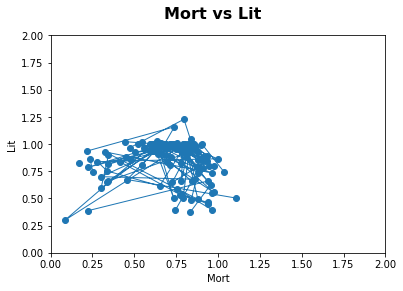

In [298]:
fig, ax = plt.subplots()

fig.suptitle("Mort vs Lit", fontsize=16, fontweight="bold")

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)

ax.set_xlabel("Mort")
ax.set_ylabel("Lit")

ax.plot(x_axis, y_axis, linewidth=1, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()